In [10]:
import os
from os.path import isfile, join

import re

import numpy as np
import pandas as pd
import seaborn as sns

In [11]:
path = '../data/graphs/kw34/result_rw'

def build_df_from_csvs(path: str) -> pd.DataFrame:
    files = os.listdir(path)
    df = pd.DataFrame()

    for current_file in files:
    # current_file = files[0]
        df_tmp = pd.read_csv(join(path, current_file), delimiter=',\t')
        
        prefix = [re.findall(r'(\w+?)(\d+\.\d+|\d+)', identifier)[0] for identifier in current_file.split('-')[0].split('_')]
        for cn, cv in prefix:
            df_tmp[cn] = pd.to_numeric(cv)

        suffix = current_file.split('-')[2].split('_')
        if len(suffix) == 3:
            suffix[1] = '{}_{}'.format(suffix[1], suffix[2])
            suffix.pop(2)
        suffix[1] = suffix[1].split('.')[0]
        df_tmp['Sampling'] = suffix[0]
        df_tmp['Clustering'] = suffix[1]
        
        df = pd.concat([df, df_tmp])

    # postprocess
    df['jsd'] = df['jsd'].apply(lambda x: 1 - x)
    df.rename(columns = {'jsd':'ijsd'}, inplace = True)

    return df

df = build_df_from_csvs(path)
df.head()

,Checkpoint,bootstrap_jsd,gambette,cluster_number,ijsd,ari,n,k,log,Sampling,Clustering
0,10,0.000000,0.994230,1,0.974538,1.000000,100,3,0.3,modifiedrandomwalk,cw
1,20,0.000000,0.978541,1,0.974538,1.000000,100,3,0.3,modifiedrandomwalk,cw
2,30,0.013543,0.976104,3,0.792277,0.000000,100,3,0.3,modifiedrandomwalk,cw
3,40,0.015185,0.956944,2,0.931105,-0.061798,100,3,0.3,modifiedrandomwalk,cw
4,50,0.025176,0.951358,3,0.845357,-0.034217,100,3,0.3,modifiedrandomwalk,cw


In [12]:
sns.set_theme(style="darkgrid")
checkpoints = [10, 20, 30, 40, 50, 100, 200, 300, 400, 500, 1000, 2000,  3000, 4000, 5000]

df_cldiv = pd.melt(df, id_vars=['Checkpoint', 'Clustering'], value_vars=['ari', 'ijsd'], var_name='Measure', value_name='Performance')
df_cldiv.head()

,Checkpoint,Clustering,Measure,Performance
0,10,cw,ari,1.000000
1,20,cw,ari,1.000000
2,30,cw,ari,0.000000
3,40,cw,ari,-0.061798
4,50,cw,ari,-0.034217


In [19]:
df_cldiv = df_cldiv.sort_values(by=['Clustering', 'Measure'])
df_cldiv.head()

,Checkpoint,Clustering,Measure,Performance
27320,100,cc_nosplit,ari,1.0
27319,50,cc_nosplit,ari,1.0
27318,40,cc_nosplit,ari,1.0
27317,30,cc_nosplit,ari,1.0
27316,20,cc_nosplit,ari,1.0


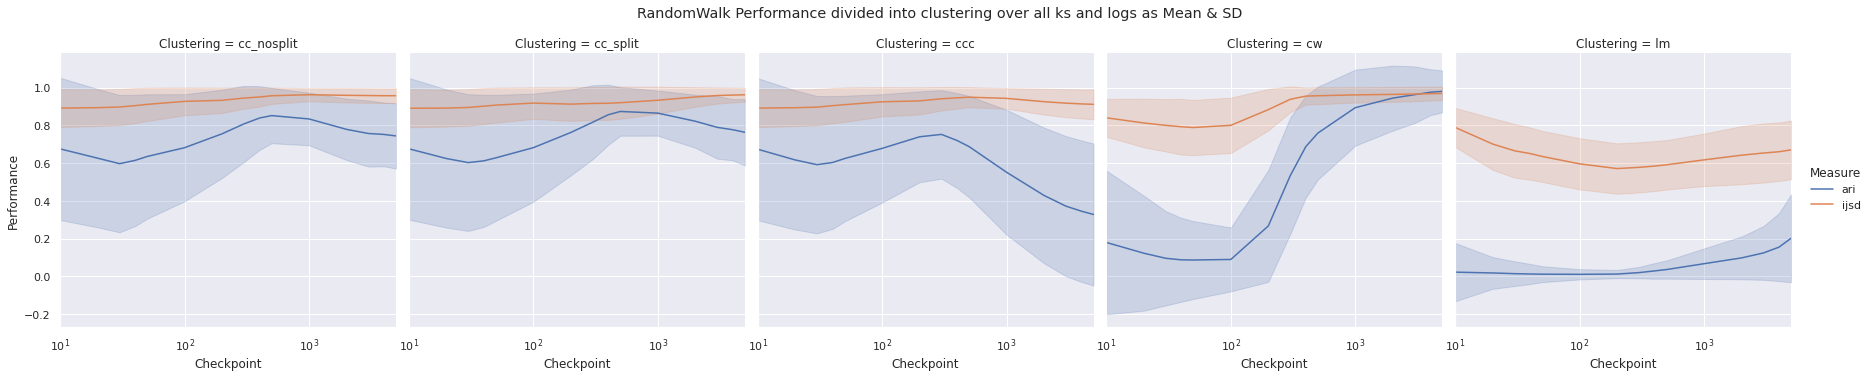

In [20]:
rp = sns.relplot(data=df_cldiv,
    x='Checkpoint', y='Performance', hue='Measure', col='Clustering', ci='sd', kind='line')

rp.fig.subplots_adjust(top=0.85)
rp.fig.suptitle('RandomWalk Performance divided into clustering over all ks and logs as Mean & SD')
rp.set(xscale='log')
rp.set(xlim=[10, 5000])